In [1]:
import pandas as pd
#nativos
import os
import unicodedata

#terceros
import pandas as pd
import pymssql
import missingno as msno
from collections import Counter

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#propios
from utils_ficha import *
from querys import *

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


In [23]:
#cef = pd.read_excel(r'C:\Users\B38381\Desktop\ALERTA CARTERA\TRASPASO CARTERA\Historico_CEF_aaaaaaaaaaaaaaaaa.xlsx', dtype={
#    'CODUNICOCLI': str, 'CODMES': str, 
#})
#cef.head()

In [24]:
#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

In [25]:
qcef_situ = """
    SELECT * FROM ODS.HD_VMVP_CEF_INDICADORES_ALERTAS_CARTERA_BE
"""
cef = pd.read_sql(
   qcef_situ , connection_market
)
cef.head(2)

,COD_UNICO,RAZON_SOCIAL,ORDEN,ORDEN_ANUAL,FECHA_CEF,DESTIPESTADOFINANCIERO,DESESTADO,MONEDA,TIPO_CAMBIO,TIPO_CAMBIO_FECHA,...,ROTACION_CTASXCOBRAR_VAR_DIAS,ROTACION_CTASXPAGAR_VAR_DIAS,ROTACION_INVENTARIOS_VAR_DIAS,ROTACION_CTASXCOBRAR_VAR,ROTACION_CTASXPAGAR_VAR,ROTACION_INVENTARIOS_VAR,DTOTAL_S_EBITDA_VAR,DTOTAL_S_VENTAS_VAR,DTOTALCAJA_S_EBITDA_VAR,EBITDA_S_SERVDEUDA_VAR
0,0017239443,INTELLI CHECK,1,4,2020-06-30,SITUACION,VALIDADO,1,3.538,2020-06-30,...,-139.637016,-118.769748,-121.298486,-0.837843,-0.782023,-0.475143,-3.583328,-0.841021,-1.041659,7.740279
1,0017239443,INTELLI CHECK,2,1,2019-12-31,SUNAT,VALIDADO,1,3.538,2020-06-30,...,94.200057,140.363372,204.358229,1.299983,12.193182,4.012513,2.906382,1.371975,3.041040,-0.363127


In [26]:
cef.columns

Index(['COD_UNICO', 'RAZON_SOCIAL', 'ORDEN', 'ORDEN_ANUAL', 'FECHA_CEF',
       'DESTIPESTADOFINANCIERO', 'DESESTADO', 'MONEDA', 'TIPO_CAMBIO',
       'TIPO_CAMBIO_FECHA', 'CAJA', 'VENTAS_NETAS', 'COSTO_VENTAS', 'EBITDA',
       'PATRIMONIO', 'INVERSION_ACTFIJOS_ANTERIOR_FLAG',
       'INVERSION_ACTFIJOS_VAR', 'INVERSION_ACTFIJOS', 'VENTAS_NETAS_ANUAL',
       'COSTO_VENTAS_ANUAL', 'EBITDA_ANUAL', 'DEUDA_TOTAL',
       'UTILIDAD_ANTES_IMP', 'UTILIDAD', 'UTILIDAD_ANTES_IMP_ANUAL',
       'UTILIDAD_ANUAL', 'INVERSION_ACTFIJOS_ANUAL', 'CAPITAL_TRABAJO',
       'ROTACION_CTASXCOBRAR', 'ROTACION_CTASXPAGAR', 'ROTACION_INVENTARIOS',
       'DTOTAL_S_VENTAS', 'DTOTAL_S_EBITDA', 'DTOTALCAJA_S_EBITDA',
       'EBITDA_S_SERVDEUDA', 'COBERTURA_FAL', 'COBERTURA_SERVICIO_DEUDA_ANT',
       'ENDEUDAMIENTO_PAS_VEN_VAR', 'APLANCAMIENTO_PATRIMONIAL_VAR',
       'RAC_IBK6_ACTIVIDAD', 'RDEU_1_COSTODEUDA', 'RLI_6_LIQUIDEZ',
       'RMET_11_METODIZADO', 'RMET_9_METODIZADO', 'RSOL_14_SOLVENCIA',
       'RSO

In [27]:
cef['ANIO'] = cef['FECHA_CEF'].apply(lambda _: _.split('-')[0])
#cef['ANIO'].value_counts()
cef['CODMES'] = cef['FECHA_CEF'].apply(lambda _: _.replace('-', '')[:6])
#cef[cef['ANIO'] == '2020']['PERIODO'].value_counts()

In [28]:
cef['MTO_VENNETAS'] = cef['VENTAS_NETAS'].copy()
cef['CODUNICOCLI'] = cef['COD_UNICO'].copy()

In [29]:
print(cef.shape)
cef = cef[cef['ANIO'].isin(['2020', '2019'])]
print(cef.shape)

(3093, 67)
(1326, 67)


In [30]:
sql_univ = """
    SELECT * FROM ODS.HD_VMVP_BASE_ALERTA_CARTERA_BE
"""
base = pd.read_sql(
   sql_univ , connection_market
)
base.head(2)

,TIPDOC,CODDOC,FECHA_ACTUALIZACION,CODUNICOCLI,NOMBRE_COMPLETO,DES_GRUPO_ECONOMICO,RIESGO,ENCARGADO,NOMBRE_JEFE,ESTADO,...,FUNNEL_3,FUNNEL_4,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,FLG_POSICION,CLASIFICACION_LIST_360
0,2,20342636714,2020-11-03 05:23:21.733,0011060494,LUBRINEGOCIOS,MORAN CATERINO,212509.428571,JOSE CARLOS ROMERO,JAVIER GONZALES VELARDE,VALIDADO,...,1,1,0,0,1,0,0,0,1,None
1,2,20549098372,2020-11-03 05:23:21.733,0013293126,VIJOSTRAN & CIA,VIJOGAS,177065.348571,RAQUEL IRENE CORDOVA ZAMORA,JAVIER GONZALES VELARDE,VALIDADO,...,1,1,0,1,0,0,0,0,1,None


In [31]:
base.shape

(807, 38)

In [32]:
base = base[['CODUNICOCLI', 'CODDOC']].merge(
    cef[['CODUNICOCLI', 'CODMES','MTO_VENNETAS']], how='left', on='CODUNICOCLI'
)
base.head()

,CODUNICOCLI,CODDOC,CODMES,MTO_VENNETAS
0,0011060494,20342636714,202006,6397.0
1,0011060494,20342636714,201912,41305.0
2,0013293126,20549098372,202008,15366.0
3,0013293126,20549098372,201912,28016.0
4,0011038268,20471203816,201912,34711.0


In [33]:
base['CODUNICOCLI'].unique().shape, base.isnull().sum()

((807,),
 CODUNICOCLI      0
 CODDOC           0
 CODMES          43
 MTO_VENNETAS    43
 dtype: int64)

In [34]:
base = base.groupby(by=['CODUNICOCLI', 'CODMES'])['MTO_VENNETAS'].max().reset_index()

base.isnull().sum(), base['CODUNICOCLI'].unique().shape, base.shape

(CODUNICOCLI     0
 CODMES          0
 MTO_VENNETAS    0
 dtype: int64,
 (764,),
 (1326, 3))

In [35]:
base.head(60)

,CODUNICOCLI,CODMES,MTO_VENNETAS
0,0000006114,201912,7576.0
1,0000038026,201912,13774.0
2,0000038026,202006,5467.0
3,0000043778,201912,33543.0
4,0000054320,201912,47371.0
5,0000054320,202008,19081.0
6,0000054635,201912,17726.0
7,0000054635,202006,7858.0
8,0000056036,201912,5127.0
9,0000056036,202006,2178.0


In [36]:
aa = base.groupby(by=['CODUNICOCLI']).size()
tienen_2 = list(aa[aa > 1].index)

In [37]:
len(tienen_2)

562

In [38]:
base['ANIO'] = base['CODMES'].apply(lambda _: str(_)[:4])
base['ANIO'].value_counts()

2019    762
2020    564
Name: ANIO, dtype: int64

In [39]:
base[base['CODUNICOCLI'].isin(tienen_2)].shape, base.shape

((1124, 4), (1326, 4))

In [40]:
base = base[base['CODUNICOCLI'].isin(tienen_2)]
base.head()

,CODUNICOCLI,CODMES,MTO_VENNETAS,ANIO
1,0000038026,201912,13774.0,2019
2,0000038026,202006,5467.0,2020
4,0000054320,201912,47371.0,2019
5,0000054320,202008,19081.0,2020
6,0000054635,201912,17726.0,2019


In [41]:
base['ANIO'].value_counts()

2020    562
2019    562
Name: ANIO, dtype: int64

In [42]:
base.head()

,CODUNICOCLI,CODMES,MTO_VENNETAS,ANIO
1,0000038026,201912,13774.0,2019
2,0000038026,202006,5467.0,2020
4,0000054320,201912,47371.0,2019
5,0000054320,202008,19081.0,2020
6,0000054635,201912,17726.0,2019


In [43]:
#pivoteo['2019'].hist()

In [44]:
#pivoteo['2020'].hist()

In [45]:
base['mes'] = base['CODMES'].apply(lambda _: int(_[-2:]))
base['mes'].head(10)

1     12
2      6
4     12
5      8
6     12
7      6
8     12
9      6
10    12
11     8
Name: mes, dtype: int64

In [46]:
def get_div_means_perios(val_anio_act , val_anio_pas):
    if pd.isnull(val_anio_act):
        return 0
    
    if pd.isnull(val_anio_pas) or not val_anio_pas:
        return None
    #if  pd.isnull(val_2019) in (0, 0.0):
    #    return None
    
    return val_anio_act / val_anio_pas

In [47]:
#row_2020 = base[
#        (base['CODUNICOCLI'] == '0000038026') & (base['ANIO'] == '2020')
#    ]
#row_2020
#list(valor_2020['MTO_VENNETAS'])[0], list(valor_2020['mes'])[0]

In [48]:
def get_ratio(cod, per):
    row_2020 = base[
        (base['CODUNICOCLI'] == cod) & (base['ANIO'] == '2020')
    ]
    valor_2020 = list(row_2020['MTO_VENNETAS'])[0]
    regla_tres_2019 = list(row_2020['mes'])[0] /12
    
    valor_2019 = base[
        (base['CODUNICOCLI'] == cod) & (base['ANIO'] == '2019')
    ]['MTO_VENNETAS'].reset_index(drop=True)[0]*regla_tres_2019
    
    #print(valor_2020[0])
    return  get_div_means_perios(valor_2020, valor_2019)

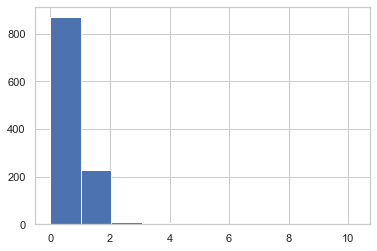

In [49]:
base['ratio_yoy'] = base[['CODUNICOCLI', 'CODMES']].apply(lambda _: get_ratio(_[0], _[1]), axis=1) 
base['ratio_yoy'].hist()

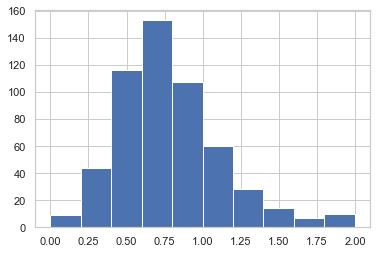

In [50]:
base = base[base['ANIO'] == '2020']
base[
    (base['ratio_yoy'] < 2) & (base['ANIO'] == '2020')
]['ratio_yoy'].hist()

In [51]:
sql_trx_cliente = """
    SELECT * FROM ODS.HD_VMVP_TRANSACCION_CLIENTE_ALERTAS_CARTERA_BE
"""
transac_cliente = pd.read_sql(
   sql_trx_cliente , connection_market
)
transac_cliente = transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'] 
transac_cliente.head(10)

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION
0,2018,201804,0000251611,CASH IN,DEPOSITOS,29,62766.64,20180427
1,2018,201804,0000251611,CASH IN,PAGOS RECIBIDOS,1,771.44,20180405
2,2018,201804,0002147783,CASH IN,TRANSFERENCIAS,2,129180.00,20180424
4,2018,201804,0002174019,CASH IN,TRANSFERENCIAS,2,46928.00,20180430
6,2018,201804,0002362010,CASH IN,DEPOSITOS,33,264328.34,20180430
8,2018,201804,0003218286,CASH IN,TRANSFERENCIAS,6,29176.25,20180419
9,2018,201804,0004089660,CASH IN,TRANSFERENCIAS,1,10100.00,20180424
11,2018,201804,0007037609,CASH IN,TRANSFERENCIAS,9,14224.73,20180430
13,2018,201804,0008025306,CASH IN,DEPOSITOS,3,128866.00,20180424
14,2018,201804,0008165990,CASH IN,POS,100,386081.66,20180430


In [52]:
transac_cliente = transac_cliente[transac_cliente['ANIO'].isin(['2019', '2020'])]
transac_cliente.columns

Index(['ANIO', 'PERIODO', 'COD_UNICO', 'TIPO_CASH', 'GRUPO_N1', 'CANT_TRX',
       'VOLUMEN_SOLES', 'MAX_FECHA_INFORMACION'],
      dtype='object')

In [53]:
transac_cliente['ANIO'].value_counts()

2019    17462
2020    15579
Name: ANIO, dtype: int64

In [54]:
transac_cliente[transac_cliente['ANIO'] == '2019']['VOLUMEN_SOLES'].sum()

3832479017.7

In [55]:
def get_ratio_cash_in(cod, per):
    valor_2019 = transac_cliente[
        (transac_cliente['COD_UNICO'] == cod) & (transac_cliente['ANIO'] == '2019') & (transac_cliente['PERIODO'].astype(int) <= int(per)) 
    ]['VOLUMEN_SOLES'].sum()
    
    valor_2020 = transac_cliente[
        (transac_cliente['COD_UNICO'] == cod) & (transac_cliente['ANIO'] == '2020') & (transac_cliente['PERIODO'].astype(int) <= int(per)) 
    ]['VOLUMEN_SOLES'].sum()

    return  get_div_means_perios(valor_2020, valor_2019)

In [56]:
def get_suma_2020(cod, per):    
    valor_2020 = transac_cliente[
        (transac_cliente['COD_UNICO'] == cod) & (transac_cliente['ANIO'] == '2020') & (transac_cliente['PERIODO'].astype(int) <= int(per)) 
    ]['VOLUMEN_SOLES'].sum()

    return  valor_2020

In [57]:
base['CASHIN2020'] =  base[['CODUNICOCLI', 'CODMES']].apply(lambda _: get_suma_2020(_[0], _[1]), axis=1) 

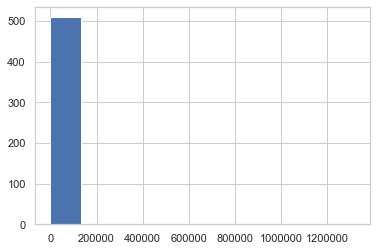

In [58]:
base['ratio_cash_in'] = base[['CODUNICOCLI', 'CODMES']].apply(lambda _: get_ratio_cash_in(_[0], _[1]), axis=1) 
base['ratio_cash_in'].hist()

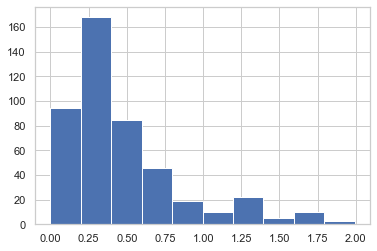

In [59]:
base[base['ratio_cash_in'] < 2]['ratio_cash_in'].hist()

In [60]:
base.head()

,CODUNICOCLI,CODMES,MTO_VENNETAS,ANIO,mes,ratio_yoy,CASHIN2020,ratio_cash_in
2,0000038026,202006,5467.0,2020,6,0.793814,450797.40,0.065925
5,0000054320,202008,19081.0,2020,8,0.604199,2257526.95,0.389300
7,0000054635,202006,7858.0,2020,6,0.886607,4687922.98,0.368737
9,0000056036,202006,2178.0,2020,6,0.849620,4160066.50,0.383222
11,0000158733,202008,6762.0,2020,8,0.829218,1708068.02,0.632715


In [61]:
base.shape, base['CODUNICOCLI'].unique().shape

((562, 8), (562,))

In [62]:
base['COD_UNICO'] = base['CODUNICOCLI']
base['PERIODO'] = base['CODMES']

In [63]:
sql_sow = """
    SELECT * FROM ODS.HD_VMVP_SOW_ALERTA_CARTERA_BE
"""
sow = pd.read_sql(
   sql_sow , connection_market
)
sow.head(2)

,COD_UNICO,PERIODO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_DIR_SF,MTOSALDO_INDIR_SF,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,SOW_IBK,SOW_BBVA,SOW_BCP,SOW_BIF,SOW_SCOTIA,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF
0,0011871466,202006,2796074.58,833016.82,2796074.58,0.0,1419738.33,0.00,0.0,543319.43,0.297923,0.507761,0.000000,0.0,0.194315,0.702076,1.000000
1,0015226664,202006,15637327.63,861831.85,14356651.63,1280676.0,1929778.11,3462803.44,0.0,6470991.35,0.055113,0.123408,0.221444,0.0,0.413816,0.758670,0.918101


In [64]:
base = base.merge(
    sow[['COD_UNICO', 'PERIODO', 'SOW_IBK']], how='left', on=['PERIODO','COD_UNICO']
)
base.head()

,CODUNICOCLI,CODMES,MTO_VENNETAS,ANIO,mes,ratio_yoy,CASHIN2020,ratio_cash_in,COD_UNICO,PERIODO,SOW_IBK
0,0000038026,202006,5467.0,2020,6,0.793814,450797.40,0.065925,0000038026,202006,0.000000
1,0000054320,202008,19081.0,2020,8,0.604199,2257526.95,0.389300,0000054320,202008,0.237076
2,0000054635,202006,7858.0,2020,6,0.886607,4687922.98,0.368737,0000054635,202006,0.383084
3,0000056036,202006,2178.0,2020,6,0.849620,4160066.50,0.383222,0000056036,202006,0.353838
4,0000158733,202008,6762.0,2020,8,0.829218,1708068.02,0.632715,0000158733,202008,0.064983


In [65]:
max_codmes = sow['PERIODO'].max()
max_codmes

'202009'

In [66]:
ult_sow = sow[sow['PERIODO'] == max_codmes ][['COD_UNICO', 'PERIODO', 'SOW_IBK']].rename(columns={
    'SOW_IBK': 'ULT_SOW'
})

In [67]:
print(base.shape)
base = base.merge(
    ult_sow, how='left', on=['COD_UNICO', 'PERIODO']
)
print(base.shape)

(562, 11)
(562, 12)


In [68]:
def get_categoria(val):
    if pd.isnull(val):
        return None
    if val <= 0.1:
        return '0-0.10'
    elif val <= 0.25:
        return '0.1-0.25'
    elif val <= 0.5:
        return '0.25-0.5'
    elif val <= 0.75:
        return '0.5-0.75'
    elif val <= 1:
        return '0.75-1'
    elif val <= 1.25:
        return '1-1.25'
    elif val <= 1.5:
        return '1.25-1.5'
    elif val <= 1.75:
        return '1.5-1.75'
    elif val <= 2:
        return '1.75-2'
    else:
        return '2.0--'

In [69]:
base.head()

,CODUNICOCLI,CODMES,MTO_VENNETAS,ANIO,mes,ratio_yoy,CASHIN2020,ratio_cash_in,COD_UNICO,PERIODO,SOW_IBK,ULT_SOW
0,0000038026,202006,5467.0,2020,6,0.793814,450797.40,0.065925,0000038026,202006,0.000000,NaN
1,0000054320,202008,19081.0,2020,8,0.604199,2257526.95,0.389300,0000054320,202008,0.237076,NaN
2,0000054635,202006,7858.0,2020,6,0.886607,4687922.98,0.368737,0000054635,202006,0.383084,NaN
3,0000056036,202006,2178.0,2020,6,0.849620,4160066.50,0.383222,0000056036,202006,0.353838,NaN
4,0000158733,202008,6762.0,2020,8,0.829218,1708068.02,0.632715,0000158733,202008,0.064983,NaN


In [70]:
base['category_CEF_ratio_yoy'] = base['ratio_yoy'].apply(get_categoria)
base['category_CASH_ratio_yoy'] = base['ratio_cash_in'].apply(get_categoria)
base['category_ULT_SOW'] = base['ULT_SOW'].apply(get_categoria)
base['category_SOW_ratio'] = base['SOW_IBK'].apply(get_categoria)

In [71]:
base.to_excel('matriz_1_1.xlsx', index=False)

In [72]:
base['MTO_VENNETAS'] = base['MTO_VENNETAS']*1000

In [73]:
base.head()

,CODUNICOCLI,CODMES,MTO_VENNETAS,ANIO,mes,ratio_yoy,CASHIN2020,ratio_cash_in,COD_UNICO,PERIODO,SOW_IBK,ULT_SOW,category_CEF_ratio_yoy,category_CASH_ratio_yoy,category_ULT_SOW,category_SOW_ratio
0,0000038026,202006,5467000.0,2020,6,0.793814,450797.40,0.065925,0000038026,202006,0.000000,NaN,0.75-1,0-0.10,None,0-0.10
1,0000054320,202008,19081000.0,2020,8,0.604199,2257526.95,0.389300,0000054320,202008,0.237076,NaN,0.5-0.75,0.25-0.5,None,0.1-0.25
2,0000054635,202006,7858000.0,2020,6,0.886607,4687922.98,0.368737,0000054635,202006,0.383084,NaN,0.75-1,0.25-0.5,None,0.25-0.5
3,0000056036,202006,2178000.0,2020,6,0.849620,4160066.50,0.383222,0000056036,202006,0.353838,NaN,0.75-1,0.25-0.5,None,0.25-0.5
4,0000158733,202008,6762000.0,2020,8,0.829218,1708068.02,0.632715,0000158733,202008,0.064983,NaN,0.75-1,0.5-0.75,None,0-0.10


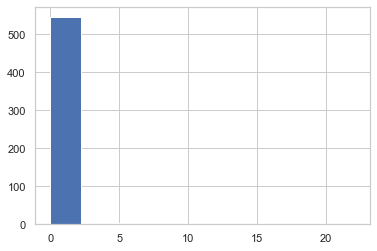

In [74]:
base['ratio_cash_in_cef_2020'] = base[['CASHIN2020', 'MTO_VENNETAS']].apply(lambda _: get_div_means_perios(_[0], _[1]), axis=1)
base['ratio_cash_in_cef_2020'].hist()                                               

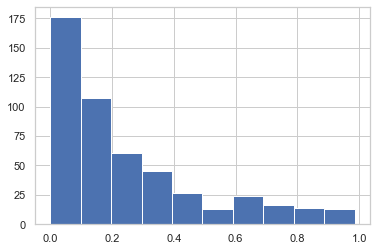

In [75]:
base[base['ratio_cash_in_cef_2020'] < 1]['ratio_cash_in_cef_2020'].hist()

In [76]:
base['category_SOW_ratio'].value_counts()

0-0.10      145
0.1-0.25    133
0.75-1      111
0.25-0.5     97
0.5-0.75     70
Name: category_SOW_ratio, dtype: int64

In [77]:
def corte_duro(val):
    if pd.isnull(val):
        return None
    
    if val < 0.5:
        return '0-0.5'
    elif val < 1:
        return '0.5-1'
    else:
        return '1_more'
base['category_participacion'] = base['ratio_cash_in_cef_2020'].apply(corte_duro)

In [78]:
base.loc[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) &\
    (base['category_SOW_ratio'].isin(['0.5-0.75', '0.75-1']))  &\
    (base['category_participacion'] == '0.5-1') &\
    (base['ratio_yoy'] > 1.5 ) &\
    (base['mes'] == 4), 'ratio_cash_in'
] = 1.72323

base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) &\
    (base['category_SOW_ratio'].isin(['0.5-0.75', '0.75-1']))  &\
    (base['category_participacion'] == '0.5-1') &\
    (base['ratio_yoy'] > 1.5 )
]

,CODUNICOCLI,CODMES,MTO_VENNETAS,ANIO,mes,ratio_yoy,CASHIN2020,ratio_cash_in,COD_UNICO,PERIODO,SOW_IBK,ULT_SOW,category_CEF_ratio_yoy,category_CASH_ratio_yoy,category_ULT_SOW,category_SOW_ratio,ratio_cash_in_cef_2020,category_participacion
365,0013219759,202004,1213000.0,2020,4,1.858529,1185808.13,1.723230,0013219759,202004,1.000000,NaN,1.75-2,0.25-0.5,None,0.75-1,0.977583,0.5-1
535,0015994198,202006,9286000.0,2020,6,1.887015,8701906.11,1.730126,0015994198,202006,0.572452,NaN,1.75-2,1.5-1.75,None,0.5-0.75,0.937100,0.5-1


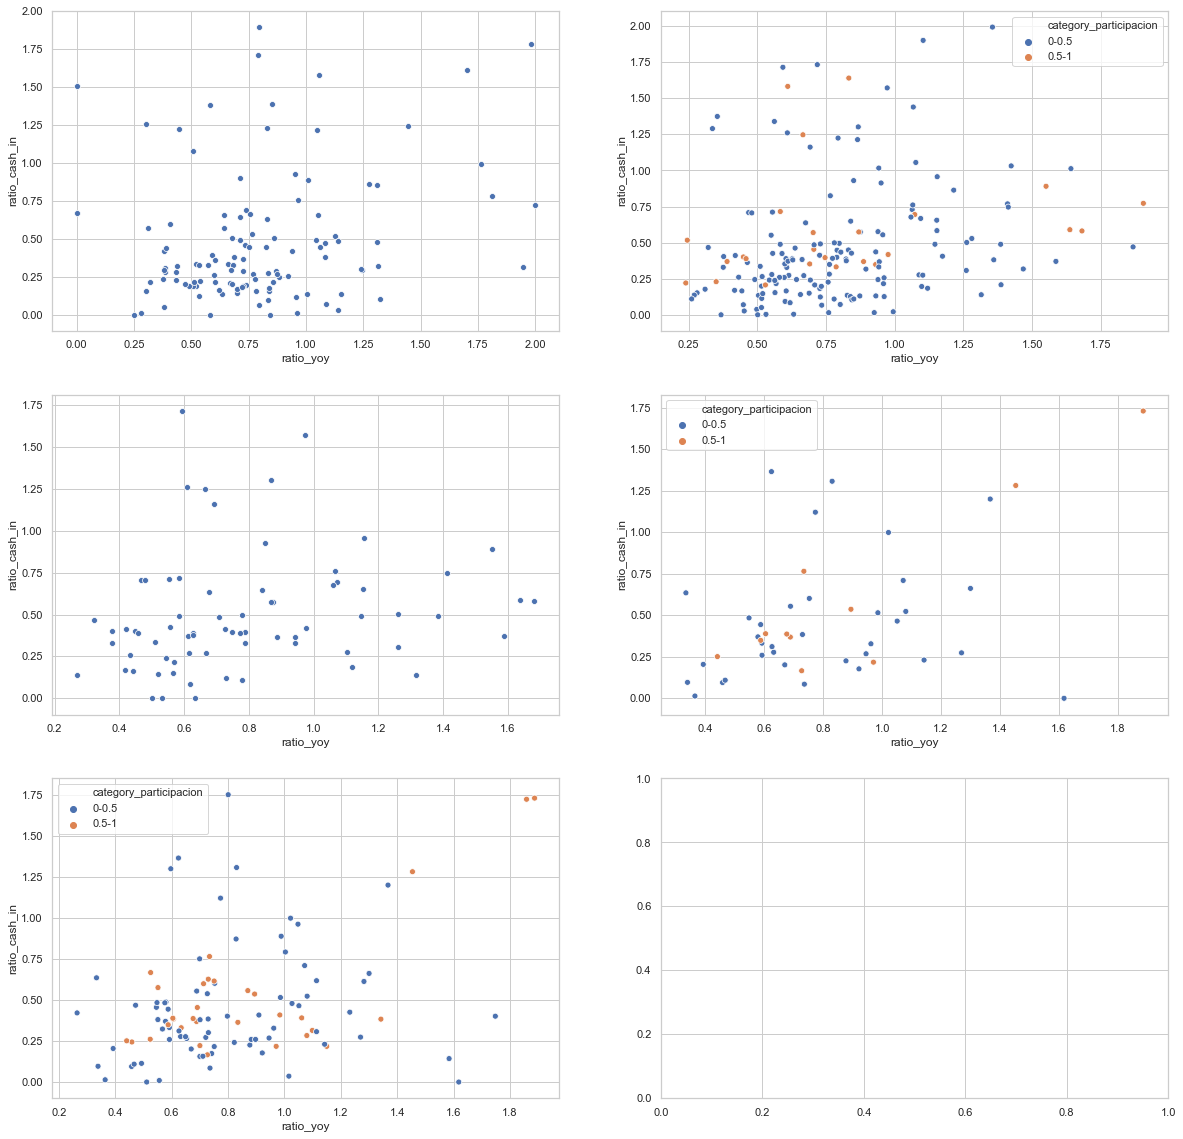

In [79]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_SOW_ratio'] == '0-0.10') & (base['category_participacion'] != '1_more')
], x="ratio_yoy", y="ratio_cash_in", ax=axes[0][0])

sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_SOW_ratio'].isin(['0.25-0.5', '0.1-0.25']) ) & (base['category_participacion'] != '1_more')
], x="ratio_yoy", y="ratio_cash_in", ax=axes[0][1],hue='category_participacion', legend='full') # 


sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_SOW_ratio'] == '0.25-0.5') & (base['category_participacion'] != '1_more')
], x="ratio_yoy", y="ratio_cash_in", ax=axes[1][0])


sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_SOW_ratio'] == '0.5-0.75') & (base['category_participacion'] != '1_more')
], x="ratio_yoy", y="ratio_cash_in", ax=axes[1][1], hue='category_participacion', legend='full')

sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_SOW_ratio'].isin(['0.5-0.75', '0.75-1']))  & (base['category_participacion'] != '1_more')
], x="ratio_yoy", y="ratio_cash_in" , ax=axes[2][0], hue='category_participacion', legend='full') #

In [ ]:
sns.lmplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_SOW_ratio'].isin(['0.5-0.75', '0.75-1']))  & (base['category_participacion'] != '1_more')
], x="ratio_yoy", y="ratio_cash_in", 
           hue='category_participacion', legend='automatic', robust=False,
          markers=["x", "o"])

    sns.scatterplot(data=base[
        (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_SOW_ratio'] == '0.75-1')
    ], x="ratio_yoy", y="ratio_cash_in")

In [ ]:
base.to_excel("matriz_1_v2.xlsx", index=False)

### "VARIANDO ACORDE AL RATIO 

In [ ]:
0-0.10      145
0.1-0.25    133
0.75-1      111
0.25-0.5     97
0.5-0.75     70

In [ ]:
base['category_participacion_deuda'] = base['ratio_cash_in_cef_2020'].apply(get_categoria)

In [ ]:
sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_participacion_deuda'] == '0-0.10')
], x="ratio_yoy", y="ratio_cash_in")

In [ ]:
sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_participacion_deuda'] == '0.1-0.25')
], x="ratio_yoy", y="ratio_cash_in")

In [ ]:
sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_participacion_deuda'] == '0.25-0.5')
], x="ratio_yoy", y="ratio_cash_in")

In [ ]:
sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_participacion_deuda'] == '0.5-0.75')
], x="ratio_yoy", y="ratio_cash_in")

In [ ]:
sns.scatterplot(data=base[
    (base['ratio_cash_in'] < 2) & (base['ratio_yoy'] < 2) & (base['category_participacion_deuda'] == '0.75-1')
], x="ratio_yoy", y="ratio_cash_in")

In [6]:
data = pd.read_excel('analisis_cliente_3_targets.xlsx', dtype={
    'COD_UNICO': str, 'PERIODO': str
})
data.head()

,PERIODO,COD_UNICO,TIENE_REACTIVA_IBK,NRO_ENTIDADES_REACTIVA,TRX_COBRANZAS_PERCENT,TRX_DEPOSITOS_PERCENT,TRX_OPERACIONES_MESA_PERCENT,TRX_OTROS_PERCENT,TRX_PAGO_DE_SERVICIOS_PERCENT,TRX_PAGOS_MASIVOS_PERCENT,...,TRX_ratio_PROM_u6m_yoy,TRX_ratio_PROM_u3m_yoy,FEVE,CODUNICOCLI,ES_ACTIVO,CLASIF_SBS,DEPARTAMENTO,target_div_u3_u6,target_ratio_u3m_yoy,target_preocupa
0,201909,0011060494,0,0,NaN,0.047561,0.421422,0.347921,0.013885,0.018227,...,1.886107,1.646842,NaN,NaN,NaN,NaN,NaN,0.716498,1.002071,NaN
1,201910,0011060494,0,0,NaN,0.055341,0.358401,0.302825,0.033758,0.005432,...,1.639241,1.002071,NaN,NaN,NaN,NaN,NaN,0.945866,1.242897,NaN
2,201911,0011060494,0,0,NaN,0.032168,0.581723,0.317634,0.003899,0.003637,...,1.546613,1.242897,NaN,NaN,NaN,NaN,NaN,0.885611,1.405411,NaN
3,201912,0011060494,0,0,NaN,0.030578,0.373368,0.363468,NaN,NaN,...,1.530425,1.405411,SEGUIR,11060494.0,S,NORMAL,LIMA,1.040337,1.196032,0.0
4,202001,0011060494,0,0,NaN,0.044333,0.271848,0.186996,0.007879,NaN,...,1.094390,1.196032,SEGUIR,11060494.0,S,NORMAL,LIMA,1.007529,0.947227,0.0


In [7]:
query = """
		SELECT '202009' PERIODO, ID_CLIE COD_UNICO,  MAX(NUM_DIAS_VENCIDOS) MAX_DIAS_ATRASO FROM 
		BE_LINEAS_INFINITE A
		WHERE 1 = 1
		AND  REPLACE(LEFT(FECHA, 7), '-', '') = '202010'
		AND  ID_CLIE IN (SELECT DISTINCT(CODUNICOCLI) FROM ODS.HD_VMVP_BASE_ALERTA_CARTERA_BE)
		GROUP BY ID_CLIE
"""
atrsaso = pd.read_sql(
   query , connection_market
)
atrsaso.head(2)

,PERIODO,COD_UNICO,MAX_DIAS_ATRASO
0,202009,0001296862,1.0
1,202009,0002622827,0.0


In [13]:
atrsaso.dtypes

PERIODO             object
COD_UNICO           object
MAX_DIAS_ATRASO    float64
dtype: object

In [8]:
data = data.merge(
    atrsaso, how='left', on= ['PERIODO', 'COD_UNICO']
)

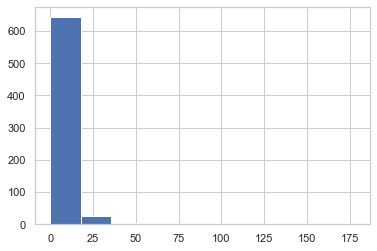

In [14]:
data['MAX_DIAS_ATRASO'].hist()

In [17]:
data['MAX_DIAS_ATRASO'] = data['MAX_DIAS_ATRASO'].astype(float)

In [18]:
def graph_numeric(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    sns.lineplot(x=col_init, y=col_out, data=data, ax=axes[0])
    sns.violinplot(x=col_init, y=col_out, data=data, ax=axes[1], orient='h')
    
    legend_list = []
    for opt in data[col_out].unique():
        sns.kdeplot(data[data[col_out] == opt][col_init], ax=axes[2], shade=True)
        legend_list.append(opt)
    plt.legend(legend_list)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

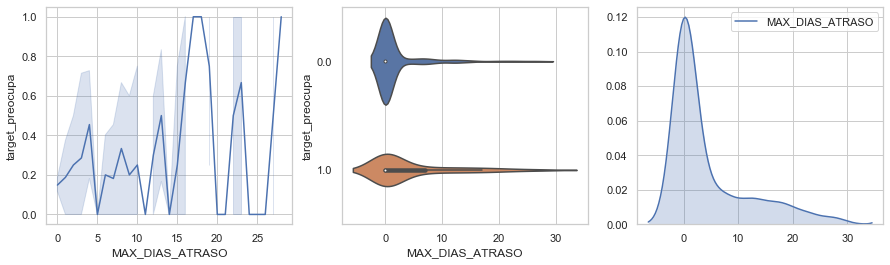

In [19]:
graph_numeric(
    data[
        (data['target_preocupa'].notnull()) & (data['PERIODO'] == '202009') & (data['MAX_DIAS_ATRASO'] < 30)
    ], 'MAX_DIAS_ATRASO', 'target_preocupa'
)

In [20]:
def graph_categoryc(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    
    cp = sns.countplot(x=col_init, hue=col_out, data=data, ax=axes[0])
    plt.setp(cp.get_xticklabels(), rotation=90)
    
    cross = pd.crosstab(data[col_out], data[col_init])
    sum_total = sum([cross[col].sum() for col in cross.columns])
    sns.heatmap(
        cross/sum_total, 
        annot=True, ax=axes[1], center=0, cmap="YlGnBu", fmt='.2%'
    )
    bp = sns.barplot(
        x=col_init, y=col_out, data=data, ax=axes[2]
    )
    plt.setp(bp.get_xticklabels(), rotation=90)

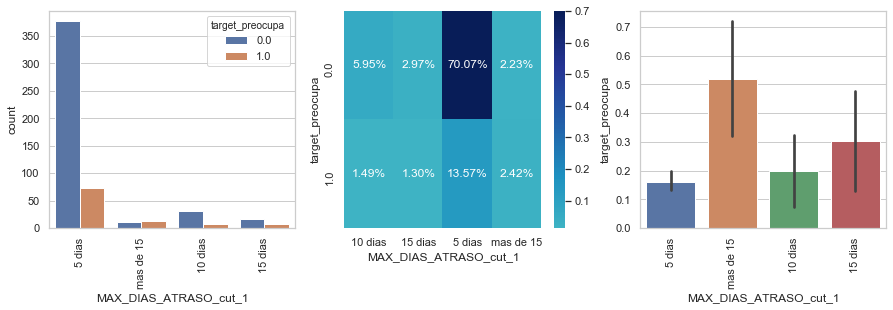

In [21]:
def cut_target_3m_yoy(val):
    if pd.isnull(val):
        return None
    
    if val < 5:
        return '5 dias'
    elif val < 10:
        return '10 dias'
    elif val < 15:
        return '15 dias'
    else:
        return 'mas de 15'
    
data['MAX_DIAS_ATRASO_cut_1'] = data['MAX_DIAS_ATRASO'].apply(cut_target_3m_yoy)
graph_categoryc(
    data[
        (data['target_preocupa'].notnull()) & (data['PERIODO'] == '202009') & (data['MAX_DIAS_ATRASO'] < 30)
    ], 'MAX_DIAS_ATRASO_cut_1', 'target_preocupa'
)

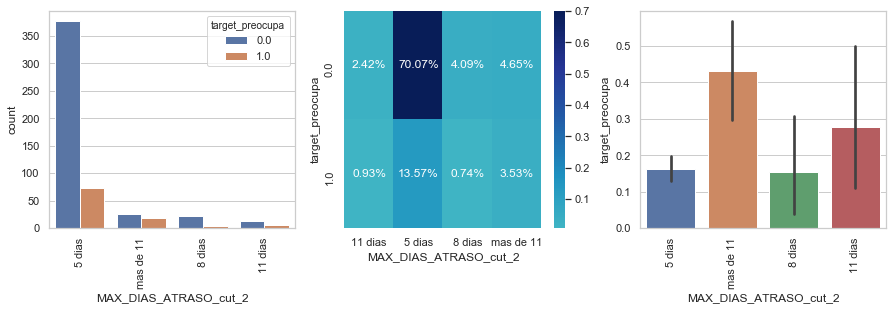

In [22]:
def cut_target_3m_yoy(val):
    if pd.isnull(val):
        return None
    
    if val < 5:
        return '5 dias'
    elif val < 8:
        return '8 dias'
    elif val < 11:
        return '11 dias'
    else:
        return 'mas de 11'
    
data['MAX_DIAS_ATRASO_cut_2'] = data['MAX_DIAS_ATRASO'].apply(cut_target_3m_yoy)
graph_categoryc(
    data[
        (data['target_preocupa'].notnull()) & (data['PERIODO'] == '202009') & (data['MAX_DIAS_ATRASO'] < 30)
    ], 'MAX_DIAS_ATRASO_cut_2', 'target_preocupa'
)